<a href="https://colab.research.google.com/github/hvmdvvn/Intro-to-Computer-Vision/blob/main/Lab_02_Drawing_Functions_(Optional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-image

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, exposure, img_as_float
from skimage.color import rgb2gray
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle

In [4]:
image = io.imread("/content/P8ORt6M.jpg")
image = img_as_float(image)

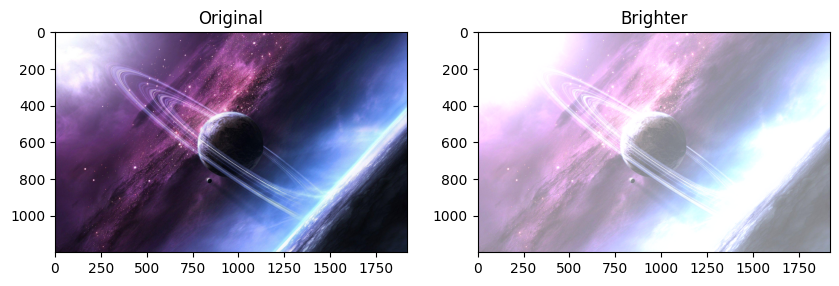

In [8]:
bright = np.clip(image + 0.5, 0, 1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(image); plt.title("Original")
plt.subplot(1,2,2); plt.imshow(bright); plt.title("Brighter")
plt.show()

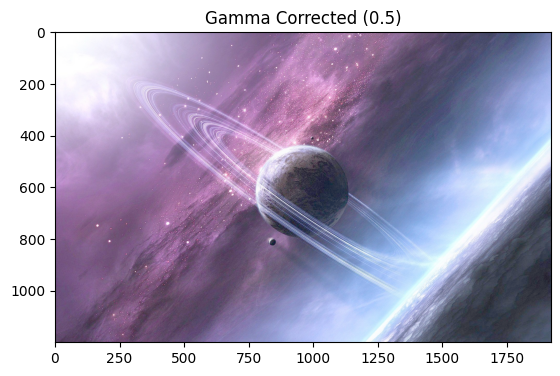

In [9]:
gamma_corrected = exposure.adjust_gamma(image, gamma=0.5)  # <1 = brighter, >1 = darker

plt.imshow(gamma_corrected)
plt.title("Gamma Corrected (0.5)")
plt.show()

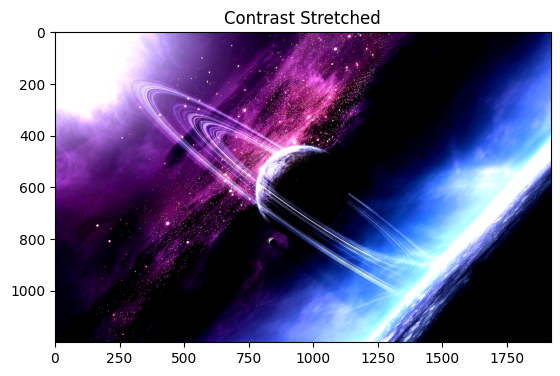

In [10]:
contrast_stretched = exposure.rescale_intensity(image, in_range=(0.2, 0.8), out_range=(0, 1))

plt.imshow(contrast_stretched)
plt.title("Contrast Stretched")
plt.show()

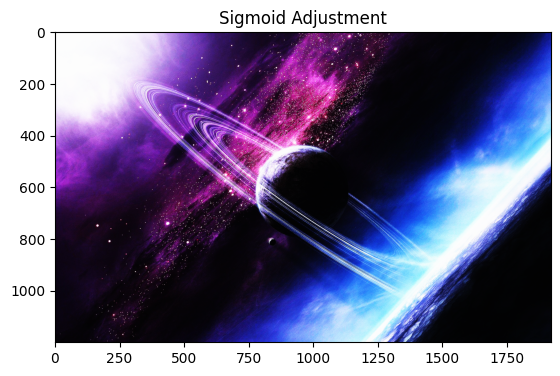

In [11]:
sigmoid = exposure.adjust_sigmoid(image, cutoff=0.5, gain=10)

plt.imshow(sigmoid)
plt.title("Sigmoid Adjustment")
plt.show()

/usr/local/lib/python3.12/dist-packages/skimage/_shared/utils.py:445: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


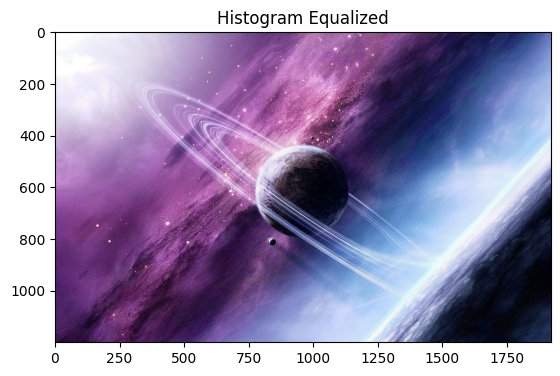

In [12]:
equalized = exposure.equalize_hist(image)

plt.imshow(equalized)
plt.title("Histogram Equalized")
plt.show()

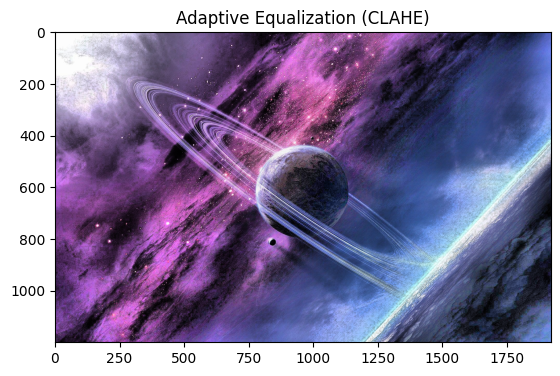

In [13]:
clahe = exposure.equalize_adapthist(image, clip_limit=0.03)

plt.imshow(clahe)
plt.title("Adaptive Equalization (CLAHE)")
plt.show()

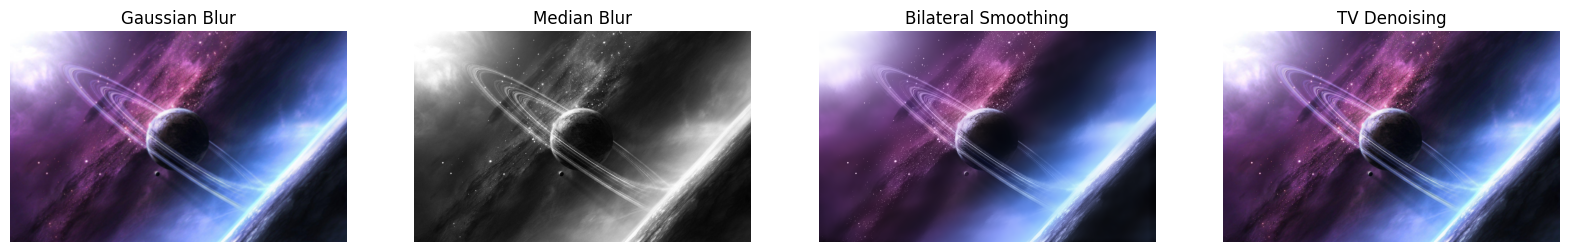

In [71]:
gaussian_blur = filters.gaussian(image, sigma=2, channel_axis=-1)

median_blur = filters.median(rgb2gray(image))

bilateral = denoise_bilateral(image, sigma_color=0.05, sigma_spatial=15, channel_axis=-1)

tv_denoised = denoise_tv_chambolle(image, weight=0.1, channel_axis=-1)

fig, axes = plt.subplots(1, 4, figsize=(20,5))
axes[0].imshow(gaussian_blur); axes[0].set_title("Gaussian Blur")
axes[1].imshow(median_blur, cmap="gray"); axes[1].set_title("Median Blur")
axes[2].imshow(bilateral); axes[2].set_title("Bilateral Smoothing")
axes[3].imshow(tv_denoised); axes[3].set_title("TV Denoising")
for ax in axes: ax.axis("off")
plt.show()

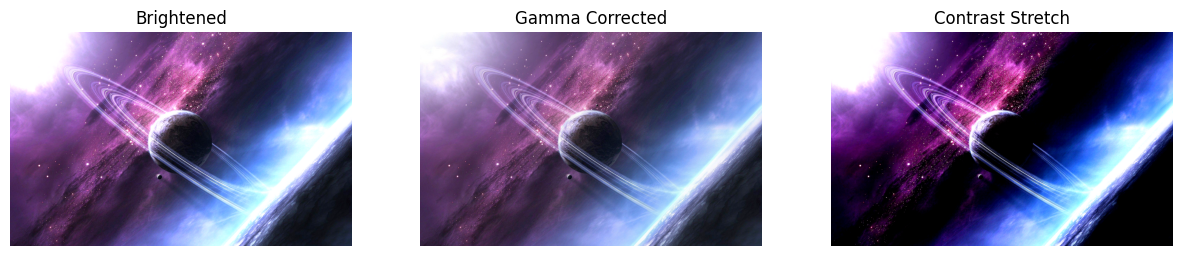

In [72]:
bright = np.clip(image * 1.3, 0, 1)

gamma_corrected = exposure.adjust_gamma(image, gamma=0.8)

contrast_stretch = exposure.rescale_intensity(image, in_range=(0.2, 0.8))

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(bright); axes[0].set_title("Brightened")
axes[1].imshow(gamma_corrected); axes[1].set_title("Gamma Corrected")
axes[2].imshow(contrast_stretch); axes[2].set_title("Contrast Stretch")
for ax in axes: ax.axis("off")
plt.show()

**Rectangle on Image with Simple Python**

In [23]:
import numpy as np
from PIL import Image

In [24]:
img = Image.open("P8ORt6M.jpg").convert("RGB")
img = np.array(img)   # convert to NumPy array (H, W, 3)

In [25]:
print("Original shape:", img.shape)

Original shape: (1200, 1920, 3)


In [26]:
def resize_nearest(image, new_h, new_w):
    h, w, c = image.shape
    y_idx = (np.linspace(0, h-1, new_h)).astype(int)
    x_idx = (np.linspace(0, w-1, new_w)).astype(int)
    return image[y_idx[:, None], x_idx, :]

In [27]:
resized = resize_nearest(img, 300, 500)
print("Resized shape:", resized.shape)

Resized shape: (300, 500, 3)


In [28]:
def draw_rectangle(image, top_left, bottom_right, color=[255,0,0], thickness=2):
    img_copy = image.copy()
    x1, y1 = top_left
    x2, y2 = bottom_right

    # top and bottom
    img_copy[y1:y1+thickness, x1:x2] = color
    img_copy[y2-thickness:y2, x1:x2] = color
    # left and right
    img_copy[y1:y2, x1:x1+thickness] = color
    img_copy[y1:y2, x2-thickness:x2] = color
    return img_copy

In [36]:
rect_img = draw_rectangle(resized, (50, 50), (200, 150), color=[0,255,0], thickness=5)
rect_img = draw_rectangle(rect_img, (100, 100), (250, 250), color=[0,0,255], thickness=3)
rect_img = draw_rectangle(rect_img, (200, 200), (350, 350), color=[255,0,255], thickness=20)

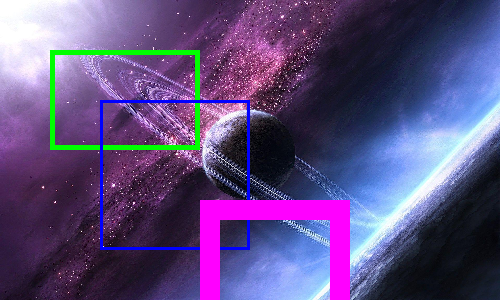

In [37]:
out = Image.fromarray(rect_img)
out.save("output.jpg")
out

**Ellipse on Image with Simple Python**

In [40]:
img = Image.open("P8ORt6M.jpg").convert("RGB")
img = np.array(img)   # convert to NumPy array (H, W, 3)

In [56]:
def draw_ellipse(image, center, axes, angle=0, color=[255,0,0], thickness=2, fill=False):
    """
    Draw an ellipse on an image (NumPy array).

    Args:
        image (np.ndarray): Image array (H, W, 3).
        center (tuple): (cx, cy) center of ellipse.
        axes (tuple): (axis_x, axis_y) radii of ellipse.
        angle (float): Rotation angle in degrees.
        color (list): [R,G,B] color.
        thickness (int): Line thickness (ignored if fill=True).
        fill (bool): If True → filled ellipse.
    """
    img_copy = image.copy()
    h, w, _ = img_copy.shape
    cx, cy = center
    ax, ay = axes
    theta = np.deg2rad(angle)

    cos_t, sin_t = np.cos(theta), np.sin(theta)

    Y, X = np.ogrid[0:h, 0:w]

    x_shift = X - cx
    y_shift = Y - cy

    xr = x_shift * cos_t + y_shift * sin_t
    yr = -x_shift * sin_t + y_shift * cos_t

    ellipse_mask = (xr**2)/(ax**2) + (yr**2)/(ay**2)

    if fill:
        img_copy[ellipse_mask <= 1] = color
    else:
        eps = thickness / max(ax, ay)
        mask = (ellipse_mask >= 1 - eps) & (ellipse_mask <= 1 + eps)
        img_copy[mask] = color

    return img_copy

In [45]:
resized = resize_nearest(img, 300, 500)

In [54]:
img1 = draw_ellipse(resized, center=(250,150), axes=(100,50), color=[0,255,0], fill=True)
img1 = draw_ellipse(img1, center=(150,250), axes=(50,100), color=[0,0,255], fill=False, thickness = 22)

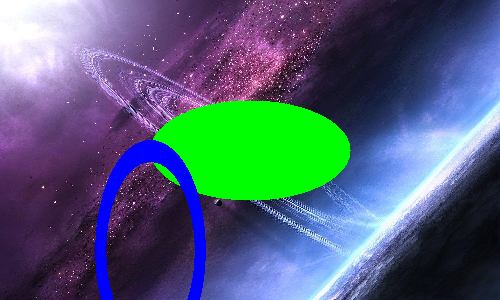

In [55]:
img1 = Image.fromarray(img1)
img1

**Text on Image with Simple Python**

In [57]:
img = Image.open("P8ORt6M.jpg").convert("RGB")
img = np.array(img)   # convert to NumPy array (H, W, 3)

In [58]:
resized = resize_nearest(img, 300, 500)

In [59]:
import requests

url = "https://github.com/google/fonts/raw/main/apache/roboto/Roboto-Regular.ttf"
response = requests.get(url)

with open("Roboto-Regular.ttf", "wb") as f:
    f.write(response.content)

print("Font downloaded successfully!")

Font downloaded successfully!


In [63]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

def draw_text(image, text, position=(10,10), color=(255,255,255), font_path="Roboto-Regular.ttf", font_size=50):
    """
    Draw text on a NumPy image using a custom font.

    Args:
        image (np.ndarray): Input image (H, W, 3).
        text (str): Text to draw.
        position (tuple): (x, y) top-left position of text.
        color (tuple): (R, G, B).
        font_path (str): Path to .ttf font file.
        font_size (int): Font size.
    """
    pil_img = Image.fromarray(image)
    draw = ImageDraw.Draw(pil_img)
    try:
        font = ImageFont.truetype(font_path, font_size)
    except OSError:
        print("⚠️ Font not found, falling back to default")
        font = ImageFont.load_default()
    draw.text(position, text, font=font, fill=color)
    return np.array(pil_img)

⚠️ Font not found, falling back to default


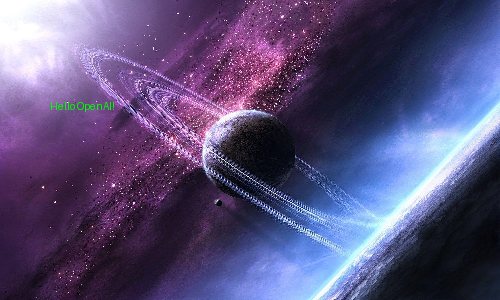

In [64]:
img = draw_text(resized, "Hello OpenAI!", position=(50,100), color=(0,255,0), font_path="Roboto-Regular.ttf", font_size=100)
img = Image.fromarray(img)
img

**Line/Arrow on Image with Simple Python**

In [66]:
def draw_line(image, start, end, color=[255,0,0], thickness=1):
    """
    Draws a straight line on an image (NumPy array) using Bresenham's algorithm.
    """
    img_copy = image.copy()
    x1, y1 = start
    x2, y2 = end

    dx, dy = abs(x2 - x1), abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy

    while True:
        # Draw pixel (with thickness support)
        for t_x in range(-thickness//2, thickness//2 + 1):
            for t_y in range(-thickness//2, thickness//2 + 1):
                xx, yy = x1 + t_x, y1 + t_y
                if 0 <= yy < img_copy.shape[0] and 0 <= xx < img_copy.shape[1]:
                    img_copy[yy, xx] = color

        if x1 == x2 and y1 == y2:
            break

        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy

    return img_copy

In [67]:
img = Image.open("P8ORt6M.jpg").convert("RGB")
img = np.array(img)   # convert to NumPy array (H, W, 3)

resized = resize_nearest(img, 300, 500)

In [68]:
img = draw_line(resized, start=(100,100), end=(200,200), color=[0,255,0], thickness=5)
img = draw_line(img, start=(100,200), end=(200,100), color=[0,0,255], thickness=2)

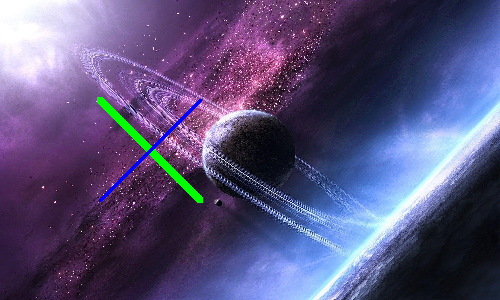

In [69]:
img = Image.fromarray(img)
img

**Tiny Image**

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

In [95]:
tiny_img = np.ones((9, 9, 3), dtype=np.float32)
zoomed_img = resize(tiny_img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

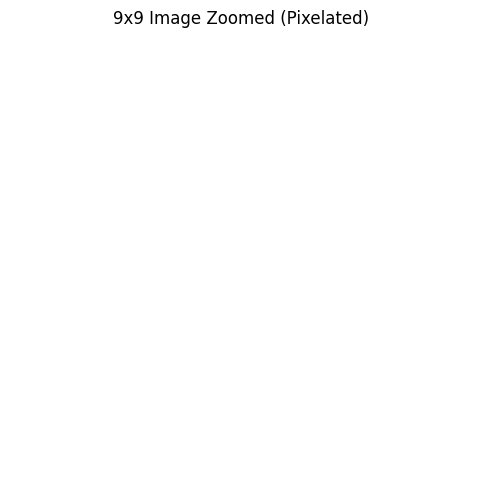

In [82]:
plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

In [86]:
tiny_img[0][0] = 0
zoomed_img = resize(tiny_img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

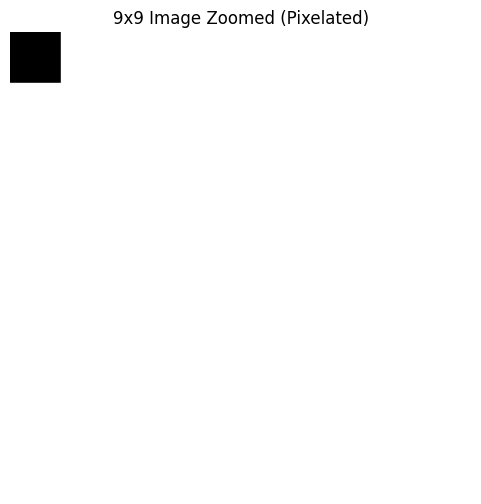

In [87]:
plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

In [88]:
tiny_img.shape

(9, 9, 3)

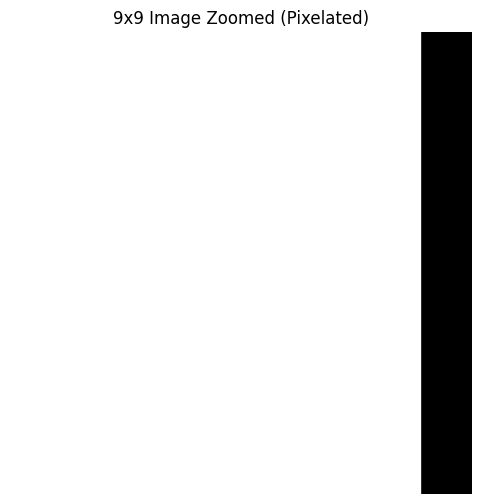

In [98]:
img = tiny_img.copy()

for i in range(tiny_img.shape[0]):
    # for j in range(tiny_img.shape[1]):
    img[i][j] = 0

zoomed_img = resize(img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

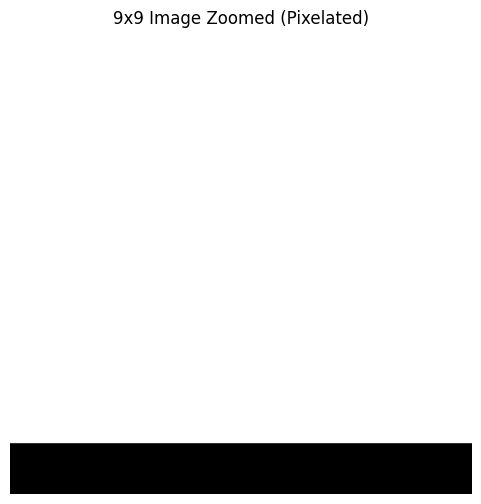

In [99]:
img = tiny_img.copy()

for j in range(tiny_img.shape[1]):
    img[i][j] = 0

zoomed_img = resize(img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

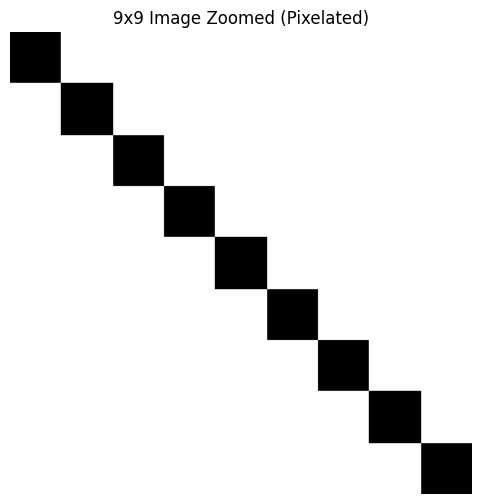

In [100]:
img = tiny_img.copy()

for j in range(tiny_img.shape[1]):
  for i in range(tiny_img.shape[0]):
    if i == j:
      img[i][j] = 0

zoomed_img = resize(img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

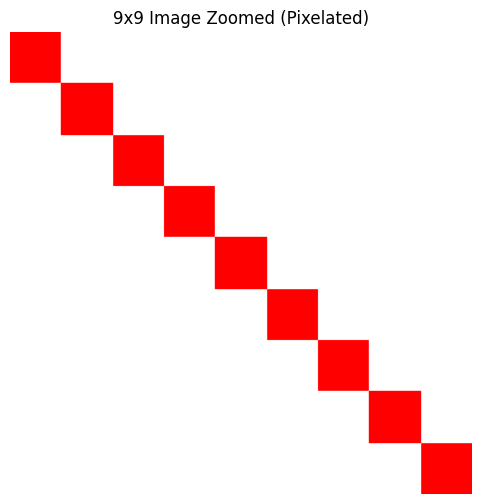

In [101]:
img = tiny_img.copy()

for j in range(tiny_img.shape[1]):
  for i in range(tiny_img.shape[0]):
    if i == j:
      img[i][j] = (255, 0 , 0)

zoomed_img = resize(img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

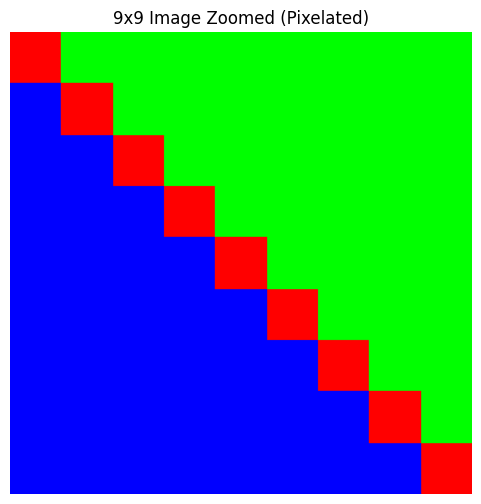

In [102]:
img = tiny_img.copy()

for j in range(tiny_img.shape[1]):
  for i in range(tiny_img.shape[0]):
    if i == j:
      img[i][j] = (255, 0 , 0)
    if i < j:
      img[i][j] = (0, 255, 0)
    if i > j:
      img[i][j] = (0, 0, 255)

zoomed_img = resize(img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image Zoomed (Pixelated)")
plt.axis("off")
plt.show()

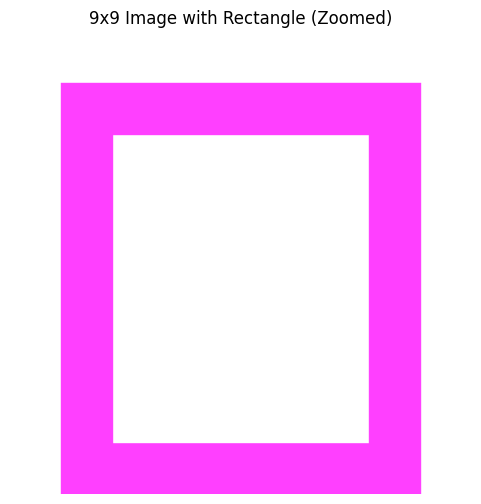

In [114]:
tiny_img = np.ones((9, 9, 3), dtype=np.float32)

def draw_rectangle(img, top_left, bottom_right, color=[1,0,0], thickness=1):
    x1, y1 = top_left
    x2, y2 = bottom_right
    img_copy = img.copy()

    # Top and bottom edges
    img_copy[y1:y1+thickness, x1:x2] = color
    img_copy[y2-thickness:y2, x1:x2] = color
    # Left and right edges
    img_copy[y1:y2, x1:x1+thickness] = color
    img_copy[y1:y2, x2-thickness:x2] = color

    return img_copy

img = draw_rectangle(tiny_img, (1,1), (8,9), color=[1,0.25,1], thickness=1)
zoomed_img = resize(img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image with Rectangle (Zoomed)")
plt.axis("off")
plt.show()

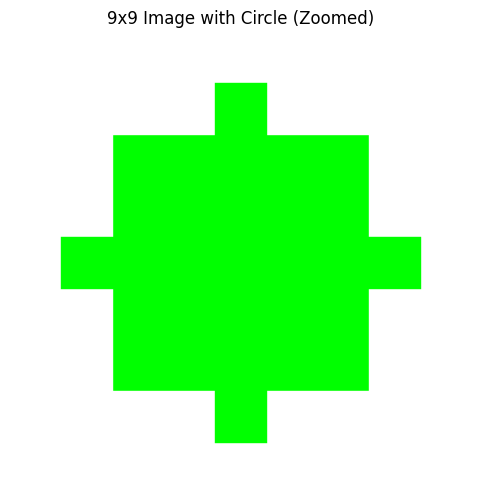

In [115]:
tiny_img = np.ones((9, 9, 3), dtype=np.float32)

def draw_circle(img, center, radius, color=[1,0,0], fill=False):
    """
    Draw a circle on a small pixel image (like 9x9).

    img : np.ndarray
        (H, W, 3) image
    center : (x,y)
        Circle center (pixel coordinates)
    radius : int
        Radius in pixels
    color : [R,G,B]
        Circle color
    fill : bool
        If True, filled circle; if False, only outline
    """
    cx, cy = center
    img_copy = img.copy()
    h, w, _ = img_copy.shape

    for y in range(h):
        for x in range(w):
            dist = (x - cx)**2 + (y - cy)**2
            if fill:
                if dist <= radius**2:
                    img_copy[y, x] = color
            else:
                if radius**2 - 1 <= dist <= radius**2 + 1:  # thin outline
                    img_copy[y, x] = color
    return img_copy

circle_img = draw_circle(tiny_img, center=(4,4), radius=3, color=[0,1,0], fill=True)
zoomed_img = resize(circle_img, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_img)
plt.title("9x9 Image with Circle (Zoomed)")
plt.axis("off")
plt.show()

In [120]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont

def draw_letter(letter, font_path=None, font_size=9, img_size=(9,9), color=(1,1,1)):
    """
    Draw a single letter on a tiny image (like 9x9).
    """
    if len(letter) != 1:
        raise ValueError("Only single characters are allowed!")

    img = Image.new("RGB", img_size, (0,0,0))
    draw = ImageDraw.Draw(img)

    if font_path:
        font = ImageFont.truetype(font_path, font_size)
    else:
        font = ImageFont.load_default()

    bbox = draw.textbbox((0,0), letter, font=font)
    w, h = bbox[2] - bbox[0], bbox[3] - bbox[1]

    pos = ((img_size[0]-w)//2, (img_size[1]-h)//2)

    rgb = tuple(int(c*255) for c in color)

    draw.text(pos, letter, font=font, fill=rgb)

    return np.array(img)/255.0

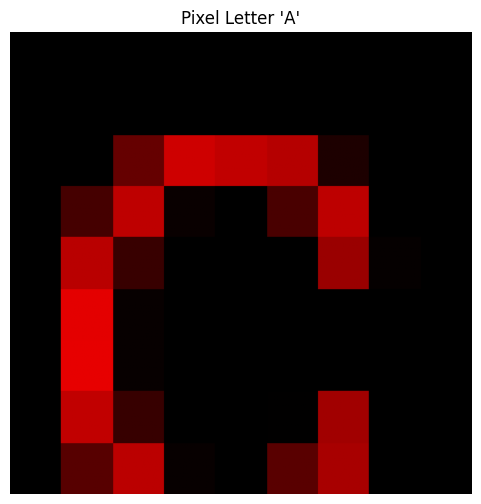

In [125]:
from skimage.transform import resize
import matplotlib.pyplot as plt

tiny_A = draw_letter("C", font_size=12, color=(1,0,0))

zoomed_A = resize(tiny_A, (300, 300), order=0, preserve_range=True, anti_aliasing=False)

plt.figure(figsize=(6,6))
plt.imshow(zoomed_A)
plt.title("Pixel Letter 'A'")
plt.axis("off")
plt.show()
